# Approximate a simulated non-linear function

# Task
- Use fully connected network to approximate a simulated non-linear function

## Data Exploration

In [1]:
file_name = '/src/data/function_approximation/xy_data.csv'

import pandas as pd
import numpy as np
df = pd.read_csv(file_name, header=None)
print(df.shape)

(3, 2000)


In [2]:
np_vector = df.values.transpose()
print(type(np_vector))
print(np_vector.shape)
print(np_vector[:5])

<class 'numpy.ndarray'>
(2000, 3)
[[-0.058929   0.06417    0.33     ]
 [ 0.16602   -0.0084448  0.33     ]
 [ 0.50408    0.098609   0.5      ]
 [-0.63563    0.97851    0.       ]
 [-0.63486    0.92308    0.       ]]


min:-0.999560, max:0.997750, median:-0.036787, mean:-0.033911, std:0.581712, size:2000


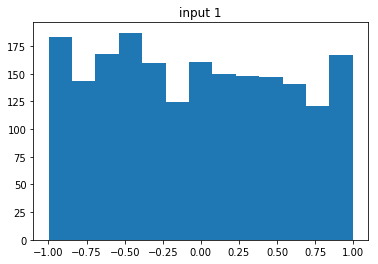

min:-0.999790, max:0.999340, median:-0.008641, mean:-0.007416, std:0.577141, size:2000


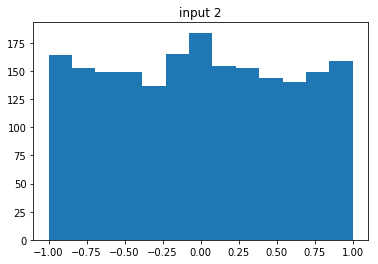

min:-0.500000, max:0.830000, median:0.000000, mean:0.034030, std:0.265202, size:2000


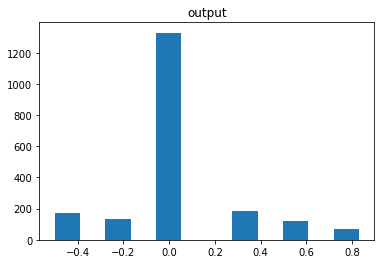

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np_vector[:, 0]
y = np_vector[:, 1]
tk = np_vector[:,2]

def explore_vector(vector, title=None):
    assert type(vector) is np.ndarray
    assert vector.ndim == 1
    print('min:%f, max:%f, median:%f, mean:%f, std:%f, size:%d' 
          % (np.min(vector), np.max(vector), np.median(vector), np.mean(vector), np.std(vector), vector.size))
    plt.title(title)
    plt.hist(vector, bins='auto')
    plt.show()

explore_vector(x, "input 1")
explore_vector(y, "input 2")
explore_vector(tk, "output")

## Data Preparation

In [4]:
# Let's shuffle it
np.random.shuffle(np_vector)
print(np_vector[:5])

[[-0.096913  0.59342  -0.5     ]
 [ 0.92707  -0.8837    0.      ]
 [ 0.87965   0.20002   0.      ]
 [-0.10292   0.061922  0.33    ]
 [-0.7388   -0.1865    0.      ]]


In [5]:
# separate input and output
input_vector = np_vector[:, :2]
print('input shape:' + str(input_vector.shape))
print(input_vector[:5])

output_vecotr = np_vector[:, 2]
print('output shape:' + str(output_vecotr.shape))
print(output_vecotr[:5])

input shape:(2000, 2)
[[-0.096913  0.59342 ]
 [ 0.92707  -0.8837  ]
 [ 0.87965   0.20002 ]
 [-0.10292   0.061922]
 [-0.7388   -0.1865  ]]
output shape:(2000,)
[-0.5   0.    0.    0.33  0.  ]


In [6]:
pct_training = 0.9
pct_validation = 0.1

# separate training and test data
total_size = input_vector.shape[0]
training_size = int(total_size * pct_training)
test_size = total_size - training_size
val_size = int(training_size * pct_validation)

print('Total Size: %d, Train Size: %d, Validation Size: %d, Test Size: %d'
      % (total_size, training_size - val_size, val_size, test_size))

# slice data
train_in = input_vector[:training_size]
train_out = output_vecotr[:training_size]

test_in = input_vector[training_size:]
test_out = output_vecotr[training_size:]


val_in = train_in[:val_size]
val_out = train_out[:val_size]

train_in = train_in[val_size:]
train_out = train_out[val_size:]

print('train_in shape:' + str(train_in.shape))


Total Size: 2000, Train Size: 1620, Validation Size: 180, Test Size: 200
train_in shape:(1620, 2)


# Model Construction

In [7]:
from keras import models
from keras import layers

# construct model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))

model.summary()

# custom metrics
import keras.backend as K

def max_diff(y_true, y_pred):
    return K.max(K.abs(y_pred-y_true))

def min_diff(y_true, y_pred):
    return K.min(K.abs(y_pred-y_true))

# compile model with optimizer, loss function
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=[max_diff, min_diff])

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
__________

In [8]:
history = model.fit(train_in,
                    train_out,
                    epochs=500,
                    batch_size=32,
                    validation_data=(val_in, val_out))

Train on 1620 samples, validate on 180 samples
Epoch 1/500
1620/1620 [==============================] - 3s 2ms/step - loss: 0.0559 - max_diff: 0.6279 - min_diff: 0.0049 - val_loss: 0.0549 - val_max_diff: 0.6015 - val_min_diff: 0.0070
Epoch 2/500
1620/1620 [==============================] - 0s 98us/step - loss: 0.0393 - max_diff: 0.4931 - min_diff: 0.0065 - val_loss: 0.0427 - val_max_diff: 0.5552 - val_min_diff: 0.0044
Epoch 3/500
1620/1620 [==============================] - 0s 94us/step - loss: 0.0319 - max_diff: 0.4492 - min_diff: 0.0035 - val_loss: 0.0335 - val_max_diff: 0.4828 - val_min_diff: 0.0043
Epoch 4/500
1620/1620 [==============================] - 0s 99us/step - loss: 0.0274 - max_diff: 0.4134 - min_diff: 0.0032 - val_loss: 0.0276 - val_max_diff: 0.3960 - val_min_diff: 0.0067
Epoch 5/500
1620/1620 [==============================] - 0s 96us/step - loss: 0.0231 - max_diff: 0.4008 - min_diff: 0.0037 - val_loss: 0.0244 - val_max_diff: 0.3671 - val_min_diff: 0.0027
Epoch 6/500
16

Epoch 44/500
1620/1620 [==============================] - 0s 101us/step - loss: 0.0081 - max_diff: 0.2938 - min_diff: 0.0023 - val_loss: 0.0100 - val_max_diff: 0.3116 - val_min_diff: 0.0037
Epoch 45/500
1620/1620 [==============================] - 0s 93us/step - loss: 0.0085 - max_diff: 0.3028 - min_diff: 0.0019 - val_loss: 0.0093 - val_max_diff: 0.2968 - val_min_diff: 0.0029
Epoch 46/500
1620/1620 [==============================] - 0s 107us/step - loss: 0.0085 - max_diff: 0.2997 - min_diff: 0.0022 - val_loss: 0.0159 - val_max_diff: 0.4117 - val_min_diff: 0.0011
Epoch 47/500
1620/1620 [==============================] - 0s 108us/step - loss: 0.0086 - max_diff: 0.2897 - min_diff: 0.0014 - val_loss: 0.0101 - val_max_diff: 0.3319 - val_min_diff: 0.0013
Epoch 48/500
1620/1620 [==============================] - 0s 100us/step - loss: 0.0083 - max_diff: 0.2960 - min_diff: 0.0027 - val_loss: 0.0090 - val_max_diff: 0.2920 - val_min_diff: 0.0025
Epoch 49/500
1620/1620 [===========================

1620/1620 [==============================] - 0s 106us/step - loss: 0.0057 - max_diff: 0.2542 - min_diff: 0.0020 - val_loss: 0.0064 - val_max_diff: 0.2630 - val_min_diff: 6.2673e-04
Epoch 88/500
1620/1620 [==============================] - 0s 95us/step - loss: 0.0050 - max_diff: 0.2543 - min_diff: 0.0013 - val_loss: 0.0083 - val_max_diff: 0.3231 - val_min_diff: 0.0035
Epoch 89/500
1620/1620 [==============================] - 0s 104us/step - loss: 0.0055 - max_diff: 0.2680 - min_diff: 0.0016 - val_loss: 0.0089 - val_max_diff: 0.3179 - val_min_diff: 0.0035
Epoch 90/500
1620/1620 [==============================] - 0s 99us/step - loss: 0.0051 - max_diff: 0.2620 - min_diff: 0.0015 - val_loss: 0.0054 - val_max_diff: 0.2606 - val_min_diff: 0.0023
Epoch 91/500
1620/1620 [==============================] - 0s 100us/step - loss: 0.0056 - max_diff: 0.2545 - min_diff: 0.0013 - val_loss: 0.0054 - val_max_diff: 0.2689 - val_min_diff: 6.5827e-04
Epoch 92/500
1620/1620 [==============================] -

Epoch 130/500
1620/1620 [==============================] - 0s 103us/step - loss: 0.0045 - max_diff: 0.2585 - min_diff: 0.0015 - val_loss: 0.0041 - val_max_diff: 0.2469 - val_min_diff: 4.8441e-04
Epoch 131/500
1620/1620 [==============================] - 0s 98us/step - loss: 0.0040 - max_diff: 0.2273 - min_diff: 0.0012 - val_loss: 0.0032 - val_max_diff: 0.1930 - val_min_diff: 3.4253e-04
Epoch 132/500
1620/1620 [==============================] - 0s 99us/step - loss: 0.0045 - max_diff: 0.2612 - min_diff: 0.0013 - val_loss: 0.0066 - val_max_diff: 0.3029 - val_min_diff: 9.1097e-04
Epoch 133/500
1620/1620 [==============================] - 0s 104us/step - loss: 0.0037 - max_diff: 0.2190 - min_diff: 0.0020 - val_loss: 0.0050 - val_max_diff: 0.2577 - val_min_diff: 8.7703e-04
Epoch 134/500
1620/1620 [==============================] - 0s 101us/step - loss: 0.0045 - max_diff: 0.2495 - min_diff: 0.0014 - val_loss: 0.0061 - val_max_diff: 0.2781 - val_min_diff: 3.4323e-04
Epoch 135/500
1620/1620 [==

1620/1620 [==============================] - 0s 102us/step - loss: 0.0034 - max_diff: 0.2321 - min_diff: 0.0011 - val_loss: 0.0043 - val_max_diff: 0.2531 - val_min_diff: 7.6649e-04
Epoch 173/500
1620/1620 [==============================] - 0s 99us/step - loss: 0.0038 - max_diff: 0.2234 - min_diff: 0.0016 - val_loss: 0.0054 - val_max_diff: 0.2748 - val_min_diff: 0.0015
Epoch 174/500
1620/1620 [==============================] - 0s 103us/step - loss: 0.0035 - max_diff: 0.2289 - min_diff: 0.0012 - val_loss: 0.0072 - val_max_diff: 0.3228 - val_min_diff: 0.0017
Epoch 175/500
1620/1620 [==============================] - 0s 101us/step - loss: 0.0035 - max_diff: 0.2182 - min_diff: 0.0016 - val_loss: 0.0052 - val_max_diff: 0.2538 - val_min_diff: 4.5313e-04
Epoch 176/500
1620/1620 [==============================] - 0s 102us/step - loss: 0.0033 - max_diff: 0.2200 - min_diff: 0.0011 - val_loss: 0.0062 - val_max_diff: 0.2785 - val_min_diff: 0.0020
Epoch 177/500
1620/1620 [===========================

1620/1620 [==============================] - 0s 106us/step - loss: 0.0033 - max_diff: 0.2259 - min_diff: 8.9882e-04 - val_loss: 0.0043 - val_max_diff: 0.2398 - val_min_diff: 5.4146e-04
Epoch 215/500
1620/1620 [==============================] - 0s 100us/step - loss: 0.0030 - max_diff: 0.2083 - min_diff: 7.8955e-04 - val_loss: 0.0051 - val_max_diff: 0.2629 - val_min_diff: 0.0020
Epoch 216/500
1620/1620 [==============================] - 0s 99us/step - loss: 0.0028 - max_diff: 0.2073 - min_diff: 0.0010 - val_loss: 0.0037 - val_max_diff: 0.1896 - val_min_diff: 1.5054e-04
Epoch 217/500
1620/1620 [==============================] - 0s 102us/step - loss: 0.0029 - max_diff: 0.2015 - min_diff: 0.0013 - val_loss: 0.0056 - val_max_diff: 0.2463 - val_min_diff: 2.1031e-04
Epoch 218/500
1620/1620 [==============================] - 0s 106us/step - loss: 0.0036 - max_diff: 0.2230 - min_diff: 0.0012 - val_loss: 0.0030 - val_max_diff: 0.2135 - val_min_diff: 7.9737e-04
Epoch 219/500
1620/1620 [===========

1620/1620 [==============================] - 0s 96us/step - loss: 0.0028 - max_diff: 0.1995 - min_diff: 9.4641e-04 - val_loss: 0.0036 - val_max_diff: 0.2351 - val_min_diff: 1.6783e-04
Epoch 257/500
1620/1620 [==============================] - 0s 96us/step - loss: 0.0023 - max_diff: 0.1892 - min_diff: 7.1895e-04 - val_loss: 0.0057 - val_max_diff: 0.3168 - val_min_diff: 7.0707e-04
Epoch 258/500
1620/1620 [==============================] - 0s 96us/step - loss: 0.0029 - max_diff: 0.2132 - min_diff: 0.0012 - val_loss: 0.0036 - val_max_diff: 0.2495 - val_min_diff: 4.9952e-04
Epoch 259/500
1620/1620 [==============================] - 0s 95us/step - loss: 0.0027 - max_diff: 0.2001 - min_diff: 9.5858e-04 - val_loss: 0.0032 - val_max_diff: 0.1801 - val_min_diff: 0.0050
Epoch 260/500
1620/1620 [==============================] - 0s 101us/step - loss: 0.0023 - max_diff: 0.1795 - min_diff: 6.7128e-04 - val_loss: 0.0039 - val_max_diff: 0.2717 - val_min_diff: 7.4175e-04
Epoch 261/500
1620/1620 [======

Epoch 298/500
1620/1620 [==============================] - 0s 94us/step - loss: 0.0025 - max_diff: 0.1965 - min_diff: 6.0069e-04 - val_loss: 0.0063 - val_max_diff: 0.2768 - val_min_diff: 5.1447e-05
Epoch 299/500
1620/1620 [==============================] - 0s 99us/step - loss: 0.0024 - max_diff: 0.1856 - min_diff: 5.9130e-04 - val_loss: 0.0049 - val_max_diff: 0.2844 - val_min_diff: 7.6992e-04
Epoch 300/500
1620/1620 [==============================] - 0s 99us/step - loss: 0.0026 - max_diff: 0.1966 - min_diff: 7.8864e-04 - val_loss: 0.0072 - val_max_diff: 0.3482 - val_min_diff: 0.0011
Epoch 301/500
1620/1620 [==============================] - 0s 96us/step - loss: 0.0023 - max_diff: 0.1837 - min_diff: 6.6407e-04 - val_loss: 0.0076 - val_max_diff: 0.3543 - val_min_diff: 4.4658e-04
Epoch 302/500
1620/1620 [==============================] - 0s 104us/step - loss: 0.0029 - max_diff: 0.2191 - min_diff: 0.0010 - val_loss: 0.0034 - val_max_diff: 0.2166 - val_min_diff: 6.0119e-04
Epoch 303/500
162

1620/1620 [==============================] - 0s 97us/step - loss: 0.0023 - max_diff: 0.1780 - min_diff: 7.3979e-04 - val_loss: 0.0030 - val_max_diff: 0.2127 - val_min_diff: 0.0016
Epoch 340/500
1620/1620 [==============================] - 0s 94us/step - loss: 0.0027 - max_diff: 0.1939 - min_diff: 5.7660e-04 - val_loss: 0.0047 - val_max_diff: 0.2632 - val_min_diff: 0.0026
Epoch 341/500
1620/1620 [==============================] - 0s 102us/step - loss: 0.0023 - max_diff: 0.1678 - min_diff: 6.6056e-04 - val_loss: 0.0050 - val_max_diff: 0.2232 - val_min_diff: 5.8417e-04
Epoch 342/500
1620/1620 [==============================] - 0s 103us/step - loss: 0.0026 - max_diff: 0.2122 - min_diff: 7.8268e-04 - val_loss: 0.0038 - val_max_diff: 0.1929 - val_min_diff: 0.0011
Epoch 343/500
1620/1620 [==============================] - 0s 102us/step - loss: 0.0026 - max_diff: 0.1926 - min_diff: 5.0899e-04 - val_loss: 0.0053 - val_max_diff: 0.2862 - val_min_diff: 8.0586e-04
Epoch 344/500
1620/1620 [========

Epoch 381/500
1620/1620 [==============================] - 0s 98us/step - loss: 0.0024 - max_diff: 0.1913 - min_diff: 5.4814e-04 - val_loss: 0.0040 - val_max_diff: 0.2460 - val_min_diff: 6.6367e-05
Epoch 382/500
1620/1620 [==============================] - 0s 94us/step - loss: 0.0019 - max_diff: 0.1724 - min_diff: 7.1213e-04 - val_loss: 0.0025 - val_max_diff: 0.1566 - val_min_diff: 0.0023
Epoch 383/500
1620/1620 [==============================] - 0s 97us/step - loss: 0.0023 - max_diff: 0.1969 - min_diff: 8.1474e-04 - val_loss: 0.0039 - val_max_diff: 0.2246 - val_min_diff: 2.7524e-04
Epoch 384/500
1620/1620 [==============================] - 0s 106us/step - loss: 0.0023 - max_diff: 0.1752 - min_diff: 8.1317e-04 - val_loss: 0.0022 - val_max_diff: 0.1743 - val_min_diff: 0.0011
Epoch 385/500
1620/1620 [==============================] - 0s 106us/step - loss: 0.0018 - max_diff: 0.1492 - min_diff: 6.0377e-04 - val_loss: 0.0031 - val_max_diff: 0.1970 - val_min_diff: 4.8403e-05
Epoch 386/500
16

1620/1620 [==============================] - 0s 97us/step - loss: 0.0019 - max_diff: 0.1932 - min_diff: 4.6559e-04 - val_loss: 0.0061 - val_max_diff: 0.2818 - val_min_diff: 0.0016
Epoch 423/500
1620/1620 [==============================] - 0s 99us/step - loss: 0.0021 - max_diff: 0.1804 - min_diff: 7.2636e-04 - val_loss: 0.0060 - val_max_diff: 0.2758 - val_min_diff: 1.8821e-04
Epoch 424/500
1620/1620 [==============================] - 0s 107us/step - loss: 0.0019 - max_diff: 0.1681 - min_diff: 7.7767e-04 - val_loss: 0.0034 - val_max_diff: 0.1927 - val_min_diff: 4.5265e-04
Epoch 425/500
1620/1620 [==============================] - 0s 98us/step - loss: 0.0022 - max_diff: 0.1769 - min_diff: 6.2552e-04 - val_loss: 0.0034 - val_max_diff: 0.1764 - val_min_diff: 0.0025
Epoch 426/500
1620/1620 [==============================] - 0s 106us/step - loss: 0.0023 - max_diff: 0.1856 - min_diff: 4.2356e-04 - val_loss: 0.0043 - val_max_diff: 0.2161 - val_min_diff: 5.7076e-04
Epoch 427/500
1620/1620 [=====

1620/1620 [==============================] - 0s 107us/step - loss: 0.0017 - max_diff: 0.1640 - min_diff: 4.3138e-04 - val_loss: 0.0038 - val_max_diff: 0.2018 - val_min_diff: 3.4570e-04
Epoch 464/500
1620/1620 [==============================] - 0s 105us/step - loss: 0.0019 - max_diff: 0.1692 - min_diff: 4.8534e-04 - val_loss: 0.0037 - val_max_diff: 0.1949 - val_min_diff: 3.5891e-04
Epoch 465/500
1620/1620 [==============================] - 0s 98us/step - loss: 0.0019 - max_diff: 0.1610 - min_diff: 5.6152e-04 - val_loss: 0.0042 - val_max_diff: 0.2078 - val_min_diff: 0.0011
Epoch 466/500
1620/1620 [==============================] - 0s 95us/step - loss: 0.0016 - max_diff: 0.1441 - min_diff: 4.1089e-04 - val_loss: 0.0045 - val_max_diff: 0.2206 - val_min_diff: 2.6160e-04
Epoch 467/500
1620/1620 [==============================] - 0s 101us/step - loss: 0.0018 - max_diff: 0.1577 - min_diff: 4.5208e-04 - val_loss: 0.0040 - val_max_diff: 0.2054 - val_min_diff: 2.2640e-04
Epoch 468/500
1620/1620 [

In [9]:
# check out history object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_max_diff', 'val_min_diff', 'loss', 'max_diff', 'min_diff'])

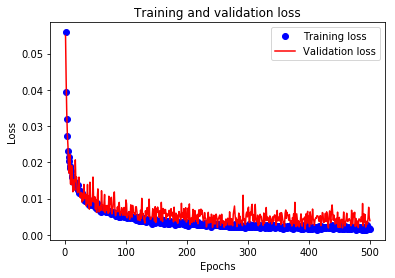

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

max_diff = history.history['max_diff']
val_max_diff = history.history['val_max_diff']

min_diff = history.history['min_diff']
val_min_diff = history.history['val_min_diff']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

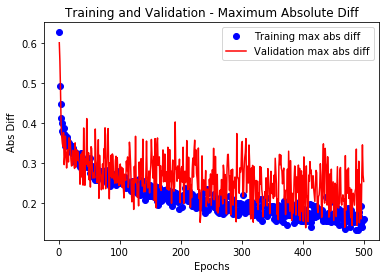

In [11]:
plt.clf()   # clear figure
plt.plot(epochs, max_diff, 'bo', label='Training max abs diff')
plt.plot(epochs, val_max_diff, 'r', label='Validation max abs diff')
plt.title('Training and Validation - Maximum Absolute Diff')
plt.xlabel('Epochs')
plt.ylabel('Abs Diff')
plt.legend()

plt.show()

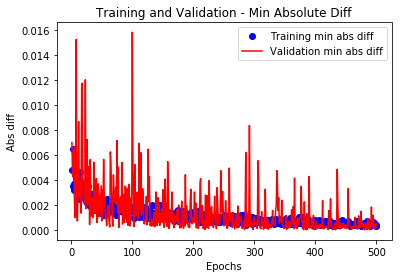

In [12]:
plt.clf()   # clear figure
plt.plot(epochs, min_diff, 'bo', label='Training min abs diff')
plt.plot(epochs, val_min_diff, 'r', label='Validation min abs diff')
plt.title('Training and Validation - Min Absolute Diff')
plt.xlabel('Epochs')
plt.ylabel('Abs diff')
plt.legend()

plt.show()

## Model Evaluation

In [13]:
# evaulate model with test data
results = model.evaluate(test_in, test_out)
results

200/200 [==============================] - 0s 184us/step


[0.004170492242192268, 0.236071435213089, 0.001328907161951065]

In [14]:
pre_test_out = model.predict(test_in)
pre_test_out = pre_test_out.flatten()

min:-0.519576, max:0.806527, median:-0.003421, mean:0.039907, std:0.259197, size:200


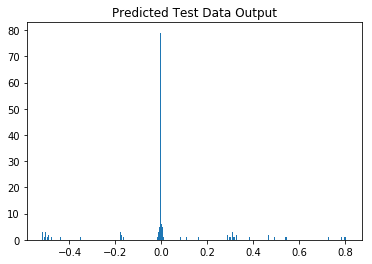

In [15]:
explore_vector(pre_test_out, 'Predicted Test Data Output')

min:-0.500000, max:0.830000, median:0.000000, mean:0.052650, std:0.270005, size:200


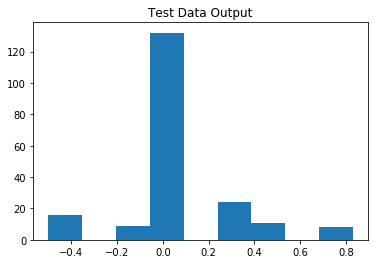

In [16]:
explore_vector(test_out, 'Test Data Output')

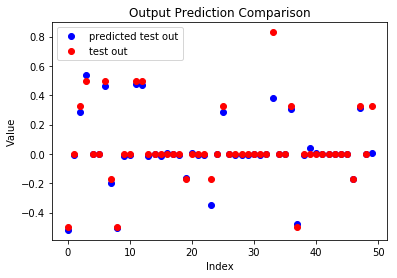

In [17]:
plt.clf()   # clear figure
NUM_PLOT = 50
plt.plot(pre_test_out[:NUM_PLOT], 'bo', label='predicted test out')
plt.plot(test_out[:NUM_PLOT], 'ro', label='test out')
plt.title('Output Prediction Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
#plt.rcParams['figure.figsize'] = [20, 20]
#plt.figure(figsize=(20, 20), dpi= 20)
plt.show()

min:0.000016, max:0.508376, median:0.004647, mean:0.021243, std:0.060985, size:200


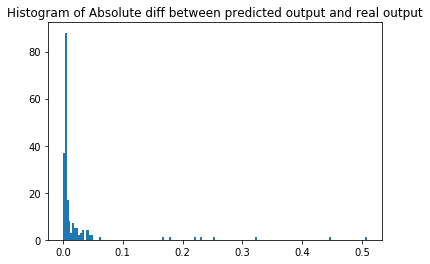

In [18]:
abs_diff_test_out = abs(pre_test_out - test_out)
plt.clf()   # clear figure
explore_vector(abs_diff_test_out, 'Histogram of Absolute diff between predicted output and real output')

Text(0, 0.5, 'Abs Diff')

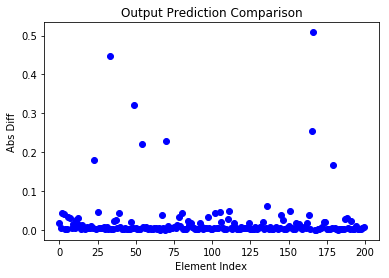

In [20]:
plt.clf()   # clear figure
plt.plot(abs_diff_test_out, 'bo', label='abs diff test out')
plt.title('Output Prediction Comparison')
plt.xlabel('Element Index')
plt.ylabel('Abs Diff')
